In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import faceted as faceted
import xarray as xr
import numpy as np
import scipy
import glob
import matplotlib as mpl

sns.set_palette('hls', 4)
sns.set_style('ticks')

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "text.latex.preamble": "\n".join([r'\usepackage{amsmath}'])
})         

In [41]:
soot_suite = xr.open_dataset("../data/LES/reisner_case/soot_profiles_variable_RH.nc")

(0.0, 0.02)

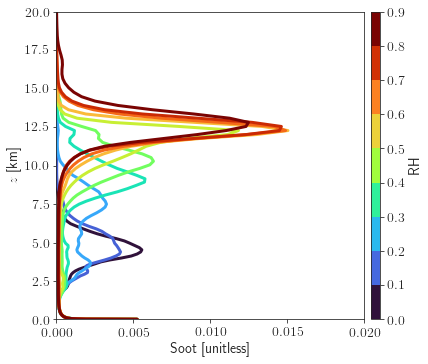

In [38]:
fig, axis, caxis = faceted.faceted(1,1, aspect=1, cbar_mode='edge', cbar_pad=.1, internal_pad=.5,
                                   width=6.0, sharey=True, sharex=False, left_pad=.8, bottom_pad=.7, 
                                   right_pad=.7)

name = "turbo"
bounds = np.arange(0, 1,.1)
colors = mpl.cm.turbo(np.linspace(0,1,len(bounds)))
levels = mpl.ticker.MaxNLocator(nbins=len(bounds)).tick_values(0.0, .9)
cmap = plt.get_cmap(name)
norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
cb1 = mpl.colorbar.ColorbarBase(caxis[0], cmap=cmap,  #boundaries = bounds,
                                norm=norm, orientation='vertical',
                                label='RH')

for RH, col in zip(soot_suite.RH, colors):
    axis[0].plot(soot_suite.sel(RH=RH).soot.values[:-1], soot_suite.sel(RH=RH).z.values[:-1]/1000,
                 linewidth=3.0, color=col)
    
axis[0].set_ylim([0, 20])
axis[0].set_xlabel("Soot [unitless]")
axis[0].set_ylabel("$z$ [km]")
axis[0].set_xlim([0, .02])